La celda de código de abajo genera los datos de consumo medio y gráficas usadas en la reclamación. Ejecútela para reproducir dichos datos.


------------------------------------------------------------------------
Facturas lectura real

------------------------------------------------------------------------
Periodo: 21/04/2015 - 24/08/2018
Meses en el periodo: 40.93 meses
Numero total de facturas: 41
Consumo medio mensual según lecturas e-distribucion (30 días): 686.99 kWh
Consumo medio mensual facturado Fenie Energía (30 días): 775.28 kWh
Consumo total en periodo según lecturas e-distribucion: 30105.00 kWh
Consumo total en periodo facturado Fenie Energía: 33797.91 kWh
------------------------------------------------------------------------


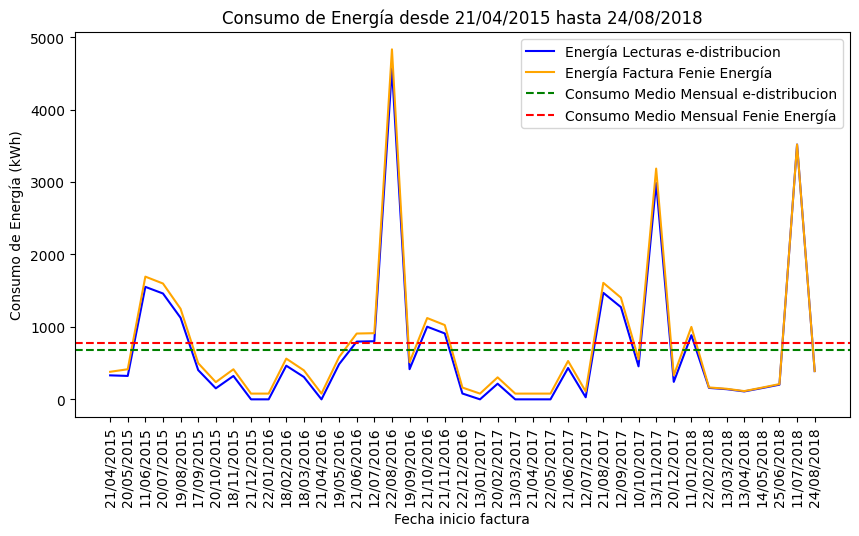


------------------------------------------------------------------------
Periodo: 31/08/2018 - 01/02/2024
Meses en el periodo: 64.57 meses
Numero total de facturas: 67
Consumo medio mensual según lecturas e-distribucion (30 días): 1734.94 kWh
Consumo medio mensual facturado Fenie Energía (30 días): 1731.26 kWh
Consumo total en periodo según lecturas e-distribucion: 106835.60 kWh
Consumo total en periodo facturado Fenie Energía: 108235.42 kWh
------------------------------------------------------------------------


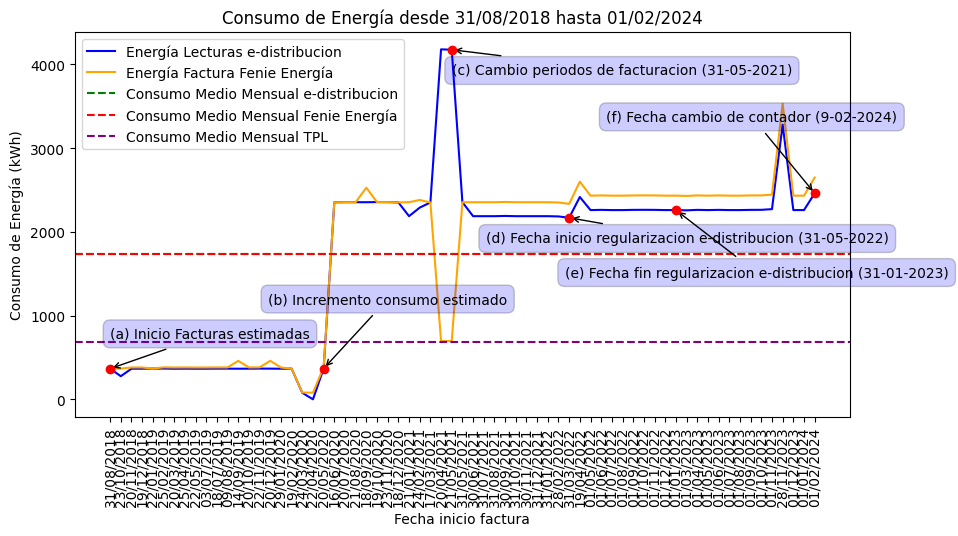


------------------------------------------------------------------------
Periodo: 31/08/2018 - 20/05/2020
Meses en el periodo: 21.83 meses
Numero total de facturas: 21
Consumo medio mensual según lecturas e-distribucion (30 días): 331.13 kWh
Consumo medio mensual facturado Fenie Energía (30 días): 357.37 kWh
Consumo total en periodo según lecturas e-distribucion: 7299.00 kWh
Consumo total en periodo facturado Fenie Energía: 7880.35 kWh
------------------------------------------------------------------------


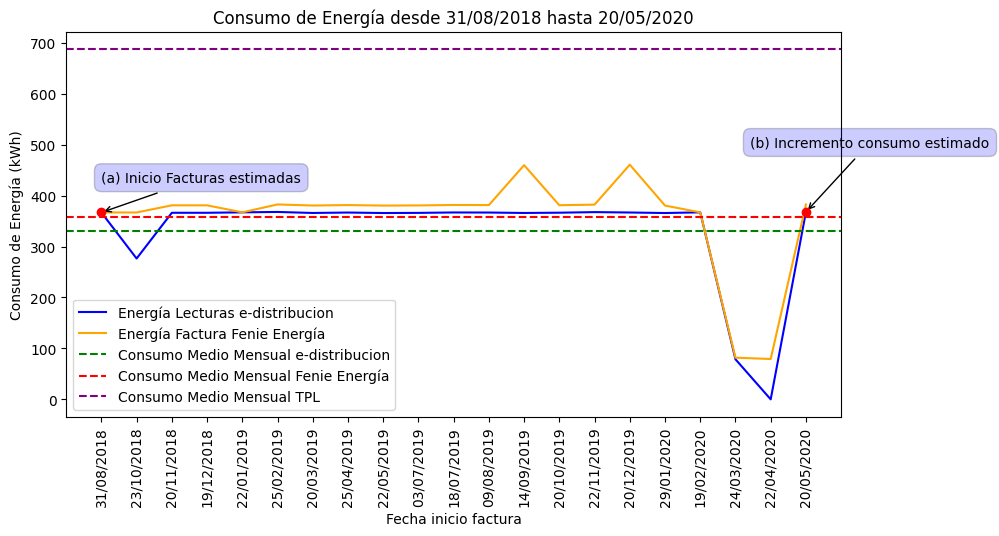


------------------------------------------------------------------------
Periodo: 16/06/2020 - 01/02/2024
Meses en el periodo: 42.73 meses
Numero total de facturas: 46
Consumo medio mensual según lecturas e-distribucion (30 días): 2375.81 kWh
Consumo medio mensual facturado Fenie Energía (30 días): 2358.48 kWh
Consumo total en periodo según lecturas e-distribucion: 99536.60 kWh
Consumo total en periodo facturado Fenie Energía: 100355.07 kWh
------------------------------------------------------------------------


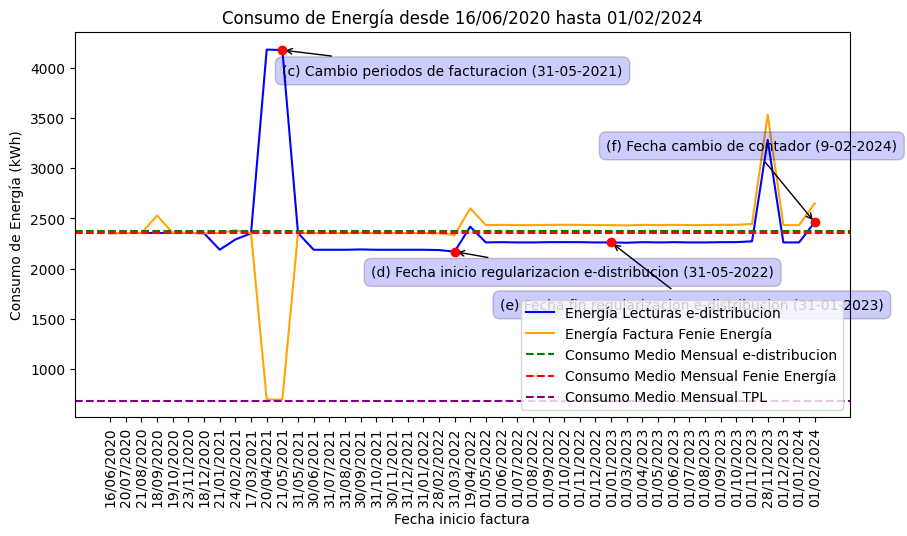

np.float64(2375.807957892363)

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('consumo.csv')

# Helper functions
def plot_energy_info(period_df, avg_monthly_tpl=None, events_idx=None, events_xy_text=None):
    num_bills = len(period_df)
    total_days = period_df['n_days'].sum()

    # Calculate total energy consumption for each row (sum of eP1, eP2, eP3)
    period_df['total_energy'] = period_df['eP1'] + period_df['eP2'] + period_df['eP3'] + period_df['eP4'] + period_df['eP5'] + period_df['eP6']
    period_df['total_energy_fenie'] = period_df['fP1'] + period_df['fP2'] + period_df['fP3'] + period_df['fP4'] + period_df['fP5'] + period_df['fP6']

    # Calculate monthly consumption (normalize to 30 days)
    period_df['monthly_consumption'] = (period_df['total_energy'] / period_df['n_days']) * 30
    period_df['monthly_fenie_consumption'] = (period_df['total_energy_fenie'] / period_df['n_days']) * 30
    
    # Calulate Monthly average consumption
    avg_monthly = period_df['monthly_consumption'].mean()
    avg_fenie_monthly = period_df['monthly_fenie_consumption'].mean()

    # Print some information
    print('\n------------------------------------------------------------------------')
    print(f"Periodo: {period_df['start_date'].iloc[0]} - {period_df['start_date'].iloc[-1]}")
    print(f"Meses en el periodo: {total_days / 30:.2f} meses")
    print(f"Numero total de facturas: {num_bills}")
    print(f"Consumo medio mensual según lecturas e-distribucion (30 días): {avg_monthly:.2f} kWh")
    print(f"Consumo medio mensual facturado Fenie Energía (30 días): {avg_fenie_monthly:.2f} kWh")
    print(f"Consumo total en periodo según lecturas e-distribucion: {period_df['total_energy'].sum():.2f} kWh")
    print(f"Consumo total en periodo facturado Fenie Energía: {period_df['total_energy_fenie'].sum():.2f} kWh")
    print('------------------------------------------------------------------------')

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(period_df['start_date'], period_df['monthly_consumption'], label='Energía Lecturas e-distribucion', color='blue')
    plt.plot(period_df['start_date'], period_df['monthly_fenie_consumption'], label='Energía Factura Fenie Energía', color='orange')
    # Add annotations for events if they exist
    if events_idx is not None and events_xy_text is not None and len(events_xy_text) == len(events_idx):
        for idx, xytext in zip(events_idx, events_xy_text):
            if idx in period_df.index and pd.notna(period_df.loc[idx, 'Evento']):
                x = period_df.loc[idx, 'start_date']
                y = period_df.loc[idx, 'monthly_consumption']
                event_text = period_df.loc[idx, 'Evento']
                plt.annotate(event_text, xy=(x, y), xytext=xytext,
                            textcoords='offset points', ha='left', va='bottom',
                            bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
                            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    # Highlight the events in the plot
    if events_idx is not None:
        plt.scatter(period_df.loc[events_idx, 'start_date'], period_df.loc[events_idx, 'monthly_consumption'], color='red', zorder=5)
    
    # Add horizontal lines for average monthly consumption
    plt.axhline(y=avg_monthly, color='green', linestyle='--', label='Consumo Medio Mensual e-distribucion')
    plt.axhline(y=avg_fenie_monthly, color='red', linestyle='--', label='Consumo Medio Mensual Fenie Energía')
    plt.axhline(y=avg_monthly_tpl, color='purple', linestyle='--', label='Consumo Medio Mensual TPL') if avg_monthly_tpl else None
    # Add title and labels
    plt.title(f"Consumo de Energía desde {period_df['start_date'].iloc[0]} hasta {period_df['start_date'].iloc[-1]}")
    plt.xlabel('Fecha inicio factura')
    plt.ylabel('Consumo de Energía (kWh)')
    plt.legend()
    plt.xticks(rotation=90)
    # plt.tight_layout()
    plt.show()

    return avg_monthly

# Filter rows where tpl is True
tpl_bills = df[df['tpl'] == True]
print('\n------------------------------------------------------------------------')
print('Facturas lectura real')
avg_monthly_tpl = plot_energy_info(tpl_bills)

# Filter rows where tpl is not True
estimated_bills = df[df['tpl'] != True]

# Get events indexes and plot
events_idx = estimated_bills.index[estimated_bills['Evento'].notna()].tolist()
events_xy_text = [(0, 20), (-40, 45), (0, -20), (-60, -20), (-80, -50), (-150, 50)]
plot_energy_info(df.iloc[events_idx[0]:events_idx[-1]+1], avg_monthly_tpl=avg_monthly_tpl, events_idx=events_idx, events_xy_text=events_xy_text)
plot_energy_info(df.iloc[events_idx[0]:events_idx[1]+1], avg_monthly_tpl=avg_monthly_tpl, events_idx=events_idx[:2], events_xy_text=events_xy_text[:2])
plot_energy_info(df.iloc[events_idx[1]+1:events_idx[-1]+1], avg_monthly_tpl=avg_monthly_tpl, events_idx=events_idx[2:], events_xy_text=events_xy_text[2:])